In [1]:
import numpy as np
import math
from matplotlib import pyplot as plt
from numpy import linalg as LA

Наше уравнение:
$$
u_t = u_{xx} + \pi^2 \sin(\pi x)\\
u(0,t) = u(1,t) = 0 \\
u(x,0) = 0
$$
Точным решением данного уравнения является:
$$
u(x,t) = (1-e^{-\pi^2t})\sin(\pi x)
$$
Мы же будем использовать следующую разностную схему:
$$
\frac{y^{n+1}_m - y^n_m}{\tau} = \frac{y^{n}_{m+1} - 2 y^n_m + y^n_{m-1}}{h^2} + \pi^2 \sin(\pi m h)\\
y^n_0 = y^n_M = 0\\
y^0_m = 0
$$
Откуда сразу выразим $y^{n+1}_m$:
$$
y^{n+1}_{m} = y^n_m + \tau\big(\frac{y^{n}_{m+1} - 2 y^n_m + y^n_{m-1}}{h^2} + \pi^2 \sin(\pi m h)\big)
$$
Данная схема устойчива когда:
$$
\tau/h^2 \leq 1/2
$$

In [12]:
#Параметры сетки
dx = 0.01
dt = (dx)**2/4
T_max = 1/(math.pi**2)
N = int(T_max/dt)
M = int(1/dx)

In [13]:
#Начальные данные
y = np.zeros((N+1,M+1))

In [14]:
#Рассчет решения
for i in range(N):
    for j in range (1,M):
        y[i+1][j] = y[i][j] + dt*((y[i][j+1] - 2*y[i][j] + y[i][j-1])/(dx)**2 + math.pi**2 * math.sin(math.pi*j*dx))

In [15]:
x = np.arange(0,1+dx,dx)
n = 150
n*dt

0.0037500000000000003

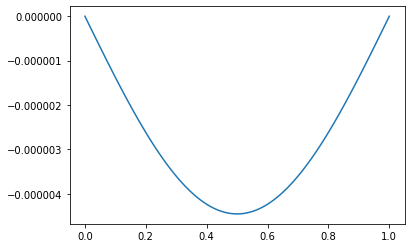

In [16]:
plt.plot(x,(1-math.e**(-math.pi**2 * n *dt)) * np.sin(math.pi*x)-y[n])